# Lab Assignment: Multi-Classification: Logits Regression & MLP


# Content Framework


-|-


- PART ONE: Load + View

  1. Data Loading & Exploration (NO Preprocessing, just View!)
  
      - Load as df format

      - Basic Info (head() / info() / describe())

      - Shape

      - (**Rows**) First few data rows, know overall info of each columns to understand what it exactly is?

      - (**Cols**) 
        - Check NULL
        - Type (Numerical | Catergorical)
        - Visualization (Count Bar)

-|-

- PART TWO: Preprocessing

  2. Data Preprocessing (Deal with data and modify them)
      
      - Define X & y
  
      - (**Cols**): for we know NULL Value ratio in **PART ONE**

      - Filled NULL Values

      - **Correlation Matrix** (The relative relationships between cols)

      $$r = \frac{n\sum xy - \sum x \sum y}{\sqrt{(n\sum x^2 - (\sum x)^2) (n\sum y^2 - (\sum y)^2)}}$$

      ```python
      basic_default_corr = df.corr() # using Pearson Correlation (Linear)
      spearman_corr = df.corr(method='spearman') # Spearman (non-Linear)

      kendall_corr = df.corr(method='kendall') # Kendall (small-datasize)
      ```
      
      - By human / Cor Matrix, drop out some of the columns ```(Feature Reduction)```

      - `Feature Scaling` (only for X, not for y!!!)


-|-


- PART Three: Model Setting & Training

  3. Initailize model's object (`Design Model's Architature`)
  
      - According to the Task's Demand, **it may need to do some data preprocessing (like: Data Loader / train Loader)**

      - Mode's **input & output demand**

      - Model's Training

-|-


- PART Four: Model's Evaluation

  4. Model's Evaluation 

      - `Depends on model's output Type` => (Numerical / Categorical)

      - Statistic / Visualzation

      - Prediction's Table / Acc / Loss


-|-

- PART Five: Model's Hyperparameters Optimizing

  5. Model's Optimizing

      - `Grid-Search` => Cross Validaztion: ! Note that in the **hyperparameter grid**, the **number of candidate hyperparameters** increases, which increases the computational complexity of the **grid search exponentially** !

      - `No Covergerence Problem` => 

---

In [361]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

## 1) Data Loading & Exporation

note that: read_csv() function, pay attention to the `delimiter=` choose?

In [362]:
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [363]:
# explore the data
print(f'Data Head: \n{data.head(5)}\n')
print(f'Data Desc: \n{data.describe()}\n')
print(f'Data Info: \n{data.info()}\n')
print(f'Data Cols: {data.columns}')

Data Head: 
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10

only choosing the `Filtering Numeric Columns`, 

**for each feature making its corresponding Visualization**

```python
# new way to write conditional assignment for attribute `row`
row = (features_num // plot_cols_number) + (1 if features_num % 4 != 0 else 0)
col = plot_cols_number

######################################################################

# the `enumerate` function, output 2 things:
# <<< index (corresponding index for certain element) + element itself
for i, col in enumerate(numerical_columns)
    pass
```

Cols Count: 12


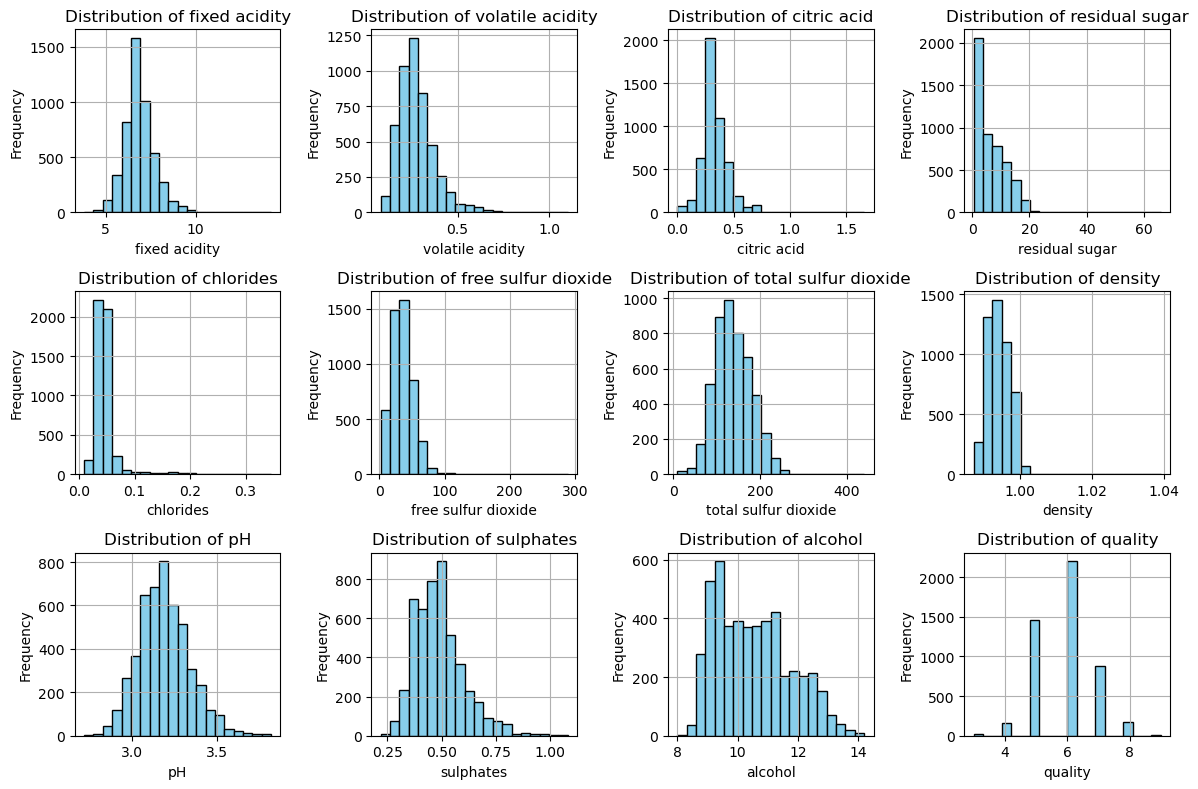

In [365]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

print(f'Cols Count: {len(numerical_columns)}')

plt.figure(figsize=(12, 8))
n_features = len(numerical_columns)

# make sure it has enough rows to contain all the graph
rows = (n_features // 4) + (1 if n_features % 4 != 0 else 0)  
cols = 4

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    data[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

by using **default .corr()**, we can know that:

1. if a .corr() value is high, that we know **it must have a high Linear Correlation**

2. Yet **while for Low corr()**, it doesn't mean that: such certain attribute has nothing to do with this target.

3. So, `such Preason (default) Correlation Matrix *only high value speaks!*` . Only high value shows that: 'it has high Linear Correlation'

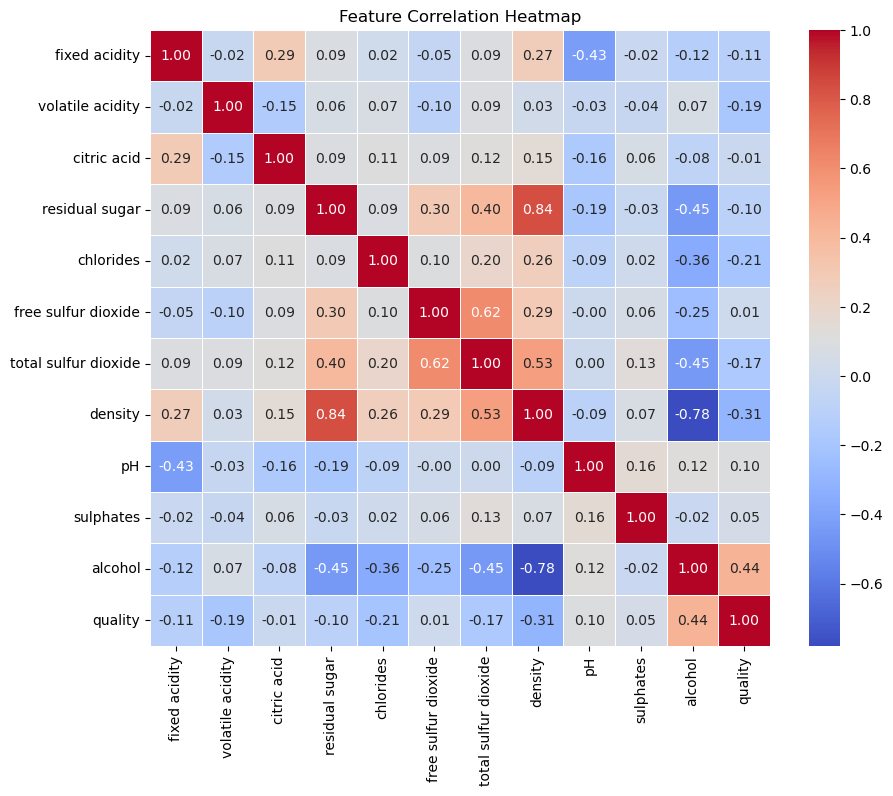

In [366]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")

plt.show()

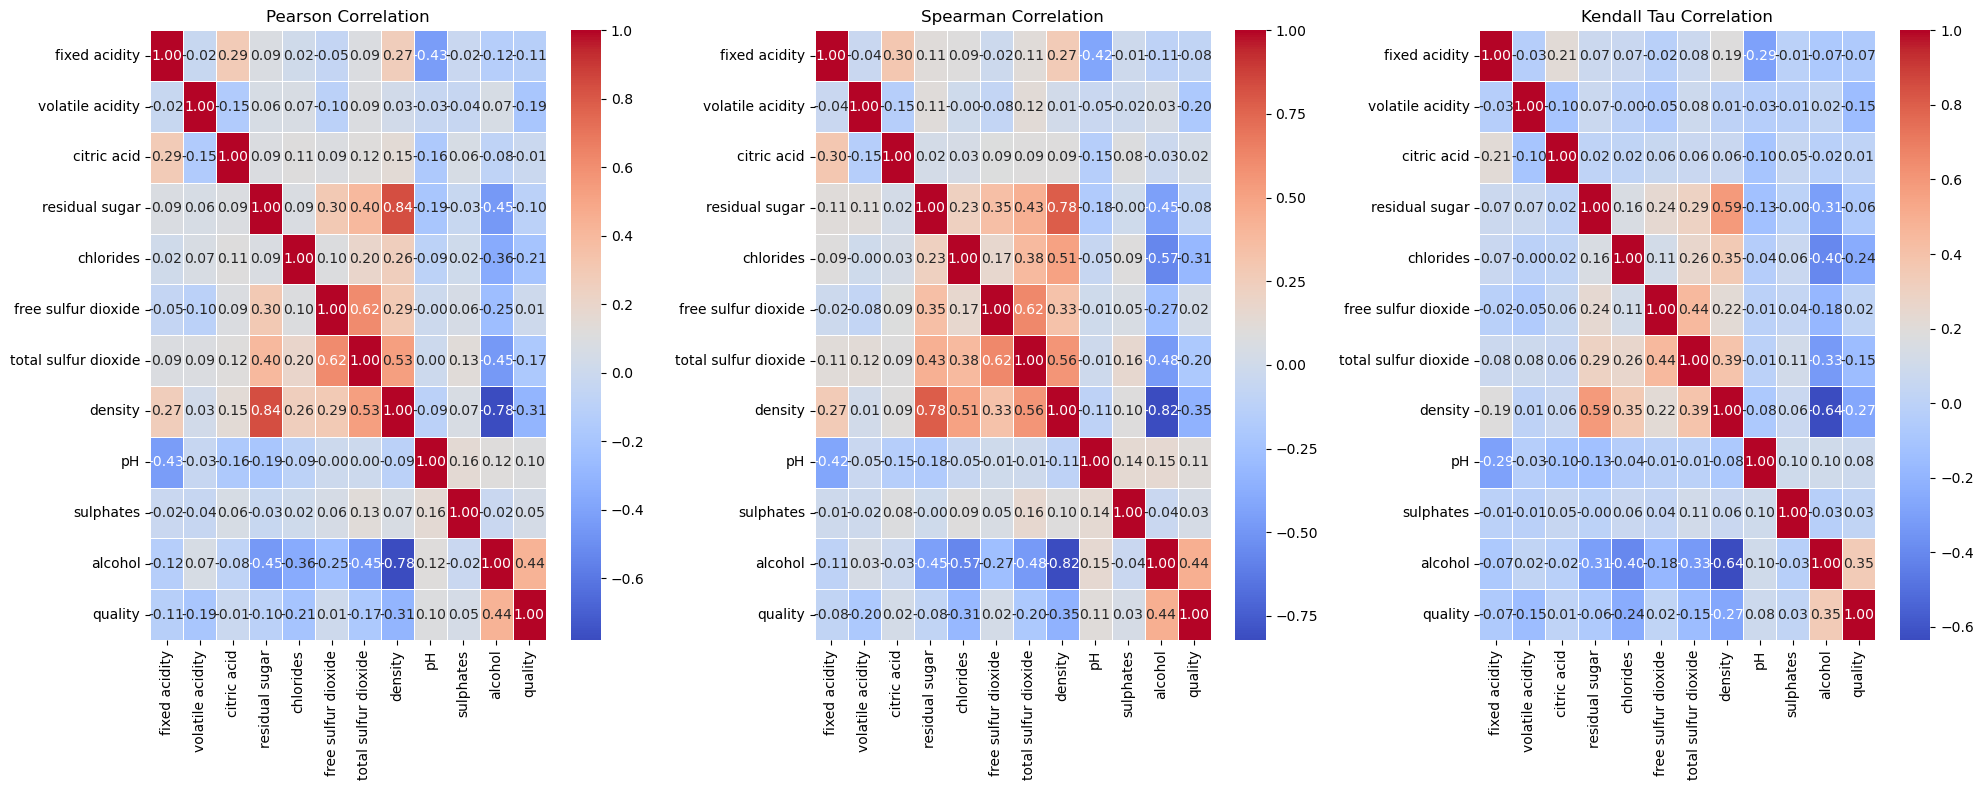

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_pearson = data.corr(method='pearson')   # Pearson相关系数
correlation_matrix_spearman = data.corr(method='spearman') # Spearman等级相关系数
correlation_matrix_kendall = data.corr(method='kendall')   # Kendall Tau相关系数

plt.figure(figsize=(20, 8))

# Pearson
plt.subplot(1, 3, 1)
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation")

# Spearman
plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation")

# Kendall Tau
plt.subplot(1, 3, 3)
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kendall Tau Correlation")

plt.tight_layout()
plt.show()

although it has different results for corr value. But combined the above three graphs together, it can know that:
    
1. attributes like 'alcohol', 'density', 'total sulfur dioxide', 'chlorides', 'volatile acidity', these attirbutes have **high correlations with the target value**

2. multi-validation on both three graphs can know and exact the **importance attributes**

---

## 2)  Data Preprocessing:

In [367]:
list(data.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [368]:
for index, col in zip(range(len(list(data.columns))), list(data.columns)):
    print(f'Col{index+1} Name:{col} \nNULL Count:{data[col].isna().sum()}\nNumeric or not: {type(data[col][0])}\n')

Col1 Name:fixed acidity 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col2 Name:volatile acidity 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col3 Name:citric acid 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col4 Name:residual sugar 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col5 Name:chlorides 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col6 Name:free sulfur dioxide 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col7 Name:total sulfur dioxide 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col8 Name:density 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col9 Name:pH 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col10 Name:sulphates 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col11 Name:alcohol 
NULL Count:0
Numeric or not: <class 'numpy.float64'>

Col12 Name:quality 
NULL Count:0
Numeric or not: <class 'numpy.int64'>



In [369]:
# a = [1, 2, 3]
# a[:-1]

**``Attn``** : ``pay attention that only applying Scaler on X value, not in y value``

so, the col's selection is dropping the last target column

```python
for i in list(data.columns)[:-1]:
```

In [370]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
print(scaler)

scaler = preprocessing.MinMaxScaler()

for i in list(data.columns)[:-1]:
    data[i] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[i])), columns=[col])

data

MinMaxScaler()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,6
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,5
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,6
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,7


In [371]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['quality'])
y = data['quality']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f'\nX_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X shape: (4898, 11)
y shape: (4898,)

X_train shape: (3918, 11)
X_test shape: (980, 11)
y_train shape: (3918,)
y_test shape: (980,)


---

## 3) Model Building

### (1) Logits Regression Model
> Implement the multi-class logistic regression using the one-vs-rest strategy

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

logit_reg = LogisticRegression(max_iter = 1000)
ovr_model = OneVsRestClassifier(logit_reg)

# ovr_model.fit(X_train, y_train)
# y_pred_logits = ovr_model.predict(X_test)
ovr_model

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

### (2) MLP Model with Torch
> Implement a neural network model with at least one hidden layer. (e.g. MLP) 

In [373]:
len(set(data['quality']))

7

`The Connection between Pandas df, Numpy array, Torch tensor`

pandas df table --> using data[col_name]`.values() to turn into np array`

np array --> using torch.Tensor(array) to transform into tensor type

In [396]:
set(data['quality'].values)

{3, 4, 5, 6, 7, 8, 9}

In [374]:
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

print(f'X Type: {type(X.values)}')
print(f'y Type: {type(y.values)}')

# convert the pd frame data type into the tensor
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.Tensor(y_train.values).long() - 3
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.Tensor(y_test.values).long() - 3

print(f'\nX_train_tensor Type: {type(X_train_tensor)}')
print(f'X_test_tensor Type: {type(X_test_tensor)}')
print(f'y_train_tensor Type: {type(y_train_tensor)}')
print(f'y_test_tensor Type: {type(y_test_tensor)}')

train_data_tensor = TensorDataset(X_train_tensor, y_train_tensor)
test_data_tensor = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data_tensor, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data_tensor, batch_size=16, shuffle=False)

# print(train_loader)

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        return x
        
print(f'\nX_train_loader shape: {X_train_tensor.shape}')
print(f'y_train_loader shape: {y_train_tensor.shape}')

input_dim = X_train_tensor.shape[1]
hidden_dim = 64
output_dim = len(set(data['quality']))

model = MLP(input_dim, hidden_dim, output_dim)
model

X Type: <class 'numpy.ndarray'>
y Type: <class 'numpy.ndarray'>

X_train_tensor Type: <class 'torch.Tensor'>
X_test_tensor Type: <class 'torch.Tensor'>
y_train_tensor Type: <class 'torch.Tensor'>
y_test_tensor Type: <class 'torch.Tensor'>

X_train_loader shape: torch.Size([3918, 11])
y_train_loader shape: torch.Size([3918])


MLP(
  (fc1): Linear(in_features=11, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=7, bias=True)
)

### (3) train both models

> Train Logits Regression

In [375]:
ovr_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

> Train MLP Model

In [376]:
print(set(data['quality']))

{3, 4, 5, 6, 7, 8, 9}


`Tips on CrossEntropyLoss()`

1. Usage: Classification task to make evaluation

    - Binary Classification: Sigmoid() => output: 0~1, so it can be assigned into 0/1 
        - > It's output a probabilities, then using threshold to assign 0/1 class

    - Multi-Classification: CrossEntropyLoss() => output: [0, C)  (C is the total categorical counts)
        - > It's output a target class NO, from 0 ~ (C-1)


$$ℓ(x,y) = L = \{l_1, \dots, l_N\}^T, l_n = -w_{y_n} \log \frac{\exp(x_{n,y_n})}{\sum_{c=1}^{C} \exp(x_{n,c})} \cdot 1\{y_n \neq \text{ignore\_index}\}$$

In [377]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

num_epochs = 1000

for epoch in range(1, num_epochs+1):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        # print(type(inputs))
        outputs = model(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

Epoch [100/1000], Loss: 0.9674982701029097
Epoch [200/1000], Loss: 0.9382570393231451
Epoch [300/1000], Loss: 0.9279738275372252
Epoch [400/1000], Loss: 0.9219055925096784
Epoch [500/1000], Loss: 0.9106614794049944
Epoch [600/1000], Loss: 0.9083683952993277
Epoch [700/1000], Loss: 0.9080040887910492
Epoch [800/1000], Loss: 0.9005474927474041
Epoch [900/1000], Loss: 0.9055685083476864
Epoch [1000/1000], Loss: 0.9009311885249858


### (4) Model Evaluation

> 4.1 Logits Evaluation

In [378]:
from sklearn.metrics import accuracy_score

logits_acc = accuracy_score(y_test, y_pred_logits)

print(f"Logistic Regression Accuracy: {logits_acc * 100:.2f}%")

Logistic Regression Accuracy: 51.73%


> 4.2 MLP Evalution

In [379]:
model.eval()
y_pred_mlp = list()

with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_mlp.extend(predicted.cpu().numpy())
        
mlp_acc = accuracy_score(y_test-3, y_pred_mlp)

print(f"MLP Model Accuracy: {mlp_acc*100:.2f}%")

MLP Model Accuracy: 53.37%


combine the above acc evalution together

In [380]:
logits_acc = accuracy_score(y_test, y_pred_logits)
mlp_acc = accuracy_score(y_test-3, y_pred_mlp)

print(f"Logistic Regression Accuracy: {logits_acc * 100:.2f}%")
print(f"MLP Model Accuracy: {mlp_acc*100:.2f}%")

Logistic Regression Accuracy: 51.73%
MLP Model Accuracy: 53.37%


> Logits Regression Report

In [381]:
from sklearn.metrics import classification_report, confusion_matrix

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logits))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.57      0.50      0.53       291
           6       0.49      0.80      0.61       432
           7       0.67      0.07      0.13       192
           8       0.00      0.00      0.00        35

    accuracy                           0.52       980
   macro avg       0.29      0.23      0.21       980
weighted avg       0.52      0.52      0.45       980



/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> MLP Model Report

In [382]:
print("MLP Classification Report:")
print(classification_report(y_test - 3, y_pred_mlp))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.31      0.16      0.21        25
           2       0.59      0.54      0.56       291
           3       0.53      0.63      0.58       432
           4       0.51      0.45      0.48       192
           5       0.20      0.06      0.09        35

    accuracy                           0.53       980
   macro avg       0.36      0.31      0.32       980
weighted avg       0.52      0.53      0.52       980



In [383]:
print(np.min(data['quality'].values))
print(np.max(data['quality'].values))

3
9


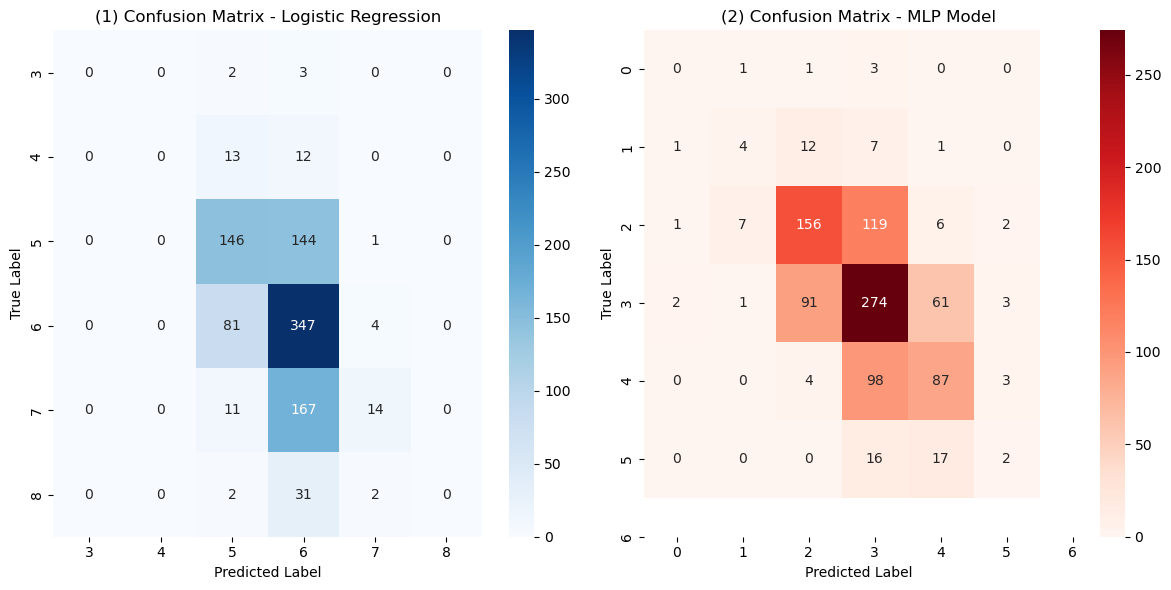

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 6))

# confusion matrix for Logits Regression
cm_logistic = confusion_matrix(y_test, y_pred_logits)

plt.subplot(1, 2, 1)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[str(i) for i in range(np.min(data['quality'].values), np.max(data['quality'].values))], 
            yticklabels=[str(i) for i in range(np.min(data['quality'].values), np.max(data['quality'].values))])

plt.title("(1) Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# confusion matrix for MLP
cm_mlp = confusion_matrix(y_test - 3, y_pred_mlp)

# Second subplot for MLP
plt.subplot(1, 2, 2)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Reds', 
            xticklabels=[str(i) for i in range(7)], 
            yticklabels=[str(i) for i in range(7)])

plt.title("(2) Confusion Matrix - MLP Model")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show both confusion matrices in the same figure
plt.tight_layout()  # To prevent overlapping of subplots
plt.show()


## 5)  Hyperparameter Tuning

### 5.1) For Logistic Regression

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define hyperparameters list grid
param_grid = {
    'C': [0.01, 0.1, 1, 2, 5, 10, 100],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'lbfgs', 'saga'],  
    'max_iter': [50, 100, 500, 1000]  
}


logreg = LogisticRegression()

# grid search CV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")
best_logreg = grid_search.best_estimator_

# use the best model's check
y_pred_logreg_tuned = best_logreg.predict(X_test_scaled)

# use the original model's check 
y_pred_logreg_untuned = logreg.fit(X_train_scaled, y_train).predict(X_test_scaled)

logreg_acc_untuned = accuracy_score(y_test, y_pred_logreg_untuned)
print(f"Logistic Regression Untuned Accuracy: {logreg_acc_untuned * 100:.2f}%")

logreg_acc_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
print(f"Logistic Regression Tuned Accuracy: {logreg_acc_tuned * 100:.2f}%")

/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Untuned Accuracy: 53.06%
Logistic Regression Tuned Accuracy: 53.16%


/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5.2) For Neural Network

`Problems of 'Non-Convergence' Problem in Machine Learning / Deep Learning`


`Insight into Non-Convergence:` The model's **loss does not steadily decrease** and tend to a minimum, or the **model's performance** indicators (such as accuracy) do **not continue to improve.**

Model non-convergence is a complex problem, usually **caused by multiple factors**. Solving this problem requires comprehensive consideration of data, models, and optimization.


`Factors probably lead to Non-Convergence`

1. Data issues:

`Poor data quality`:
Noise, errors, or missing values ​​in the data interfere with the model's learning process.
Wrong or inconsistent data labels can cause the model to learn the wrong patterns.
Insufficient data:
If the amount of training data is too small, the model may not be able to learn enough information, resulting in poor generalization and difficulty in convergence.
Uneven data distribution:
If the number of samples in some categories in the dataset is much larger than that of other categories, the model may tend to learn categories with a large number of samples, resulting in difficulty in convergence.
`Improper data preprocessing`:
Improper feature scaling (for example, no standardization or normalization) may lead to unstable model training.
Improper feature selection may cause the model to learn irrelevant or redundant features.


2. Model issues:

`Model complexity mismatch`:
The model is too simple **(underfitting)** and cannot capture complex patterns in the data.
The model is too complex **(overfitting)**, causing the model to learn noise and poor generalization.
Improper model structure:
Improper selection of the number of layers, number of neurons, activation functions, etc. of the neural network may cause the model to fail to learn effectively.
Improper `Model's hyperparameter initialization`:
If the weight initialization is too large or too small, it may cause the gradient to vanish or explode, affecting the convergence of the model.


3. Optimization issues:

Improper `learning rate setting`:
If the learning rate is too large, the model may oscillate near the optimal solution and fail to converge.
If the learning rate is too small, the model may converge too slowly or even fall into a local minimum.
Improper `optimizer selection`:
Different optimizers (such as SGD and Adam) have different advantages and disadvantages. Choosing an inappropriate optimizer may lead to convergence difficulties.
Gradient vanishing or gradient exploding:
In deep neural networks, the gradient may gradually disappear or explode during the back propagation process, resulting in the inability of the model to effectively update parameters.


4. Other issues:

Insufficient or excessive regularization:

Insufficient regularization may lead to overfitting, and excessive regularization may lead to underfitting.

Improper batch size setting:
If the batch size is too small, it may lead to unstable training, and if the batch size is too large, it may lead to insufficient memory or slow convergence.

Insufficient training time:
The model may require more training iterations to converge.



- when using `'GridSearchCV'`, although GridSearchCV is very convenient, you may encounter problems with model non-convergence if some hyperparameters are not carefully adjusted. To improve the convergence of the model, it is recommended to:

Adjust the learning rate, optimize data preprocessing (such as standardization), appropriately choose the model complexity (such as the number of layers and units in each layer of the network), and ensure that a suitable initialization method is used.

**Narrow the search space in GridSearchCV** and use strategies such as early stopping and cross-validation to improve training stability

In [386]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001, 0.1],
    'max_iter': [100],
    'tol': [1e-4],
}

# init
mlp = MLPClassifier()

# gridsearch CV
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train_scaled, y_train)

# best
print(f"Best Parameters for MLP: {grid_search_mlp.best_params_}")

best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp_tuned = best_mlp.predict(X_test_scaled)

# compare 
y_pred_mlp_untuned = mlp.fit(X_train_scaled, y_train).predict(X_test_scaled)
mlp_acc_untuned = accuracy_score(y_test, y_pred_mlp_untuned)
print(f"MLP Untuned Accuracy: {mlp_acc_untuned * 100:.2f}%")

mlp_acc_tuned = accuracy_score(y_test, y_pred_mlp_tuned)
print(f"MLP Tuned Accuracy: {mlp_acc_tuned * 100:.2f}%")


/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Use

Best Parameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (32,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 100, 'solver': 'adam', 'tol': 0.0001}
MLP Untuned Accuracy: 55.20%
MLP Tuned Accuracy: 55.92%


/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6) Performance Comparison

Create a table (**accuracy, precision, recall, F1-score**) and chart comparing the performance

In [387]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# logits regression Acc Report
logits_acc = accuracy_score(y_test, y_pred_logreg_tuned)
logits_precision = precision_score(y_test, y_pred_logreg_tuned, average='weighted')
logits_recall = recall_score(y_test, y_pred_logreg_tuned, average='weighted')
logits_f1 = f1_score(y_test, y_pred_logreg_tuned, average='weighted')

# MLP Acc Report
mlp_acc = accuracy_score(y_test, y_pred_mlp_tuned)
mlp_precision = precision_score(y_test, y_pred_mlp_tuned, average='weighted')
mlp_recall = recall_score(y_test, y_pred_mlp_tuned, average='weighted')
mlp_f1 = f1_score(y_test, y_pred_mlp_tuned, average='weighted')

compare_table = {
    'Model': ['Logistic Regression (Tuned)', 'MLP (Tuned)'],
    'Accuracy': [logits_acc * 100, mlp_acc * 100],
    'Precision': [logits_precision * 100, mlp_precision * 100],
    'Recall': [logits_recall * 100, mlp_recall * 100],
    'F1-Score': [logits_f1 * 100, mlp_f1 * 100]
}


comparison_df = pd.DataFrame(compare_table)

comparison_df

/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suleynan_suir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Tuned),53.163265,51.933802,53.163265,49.889106
1,MLP (Tuned),55.918367,54.033480,55.918367,53.376909


visualization on Model's Comparision

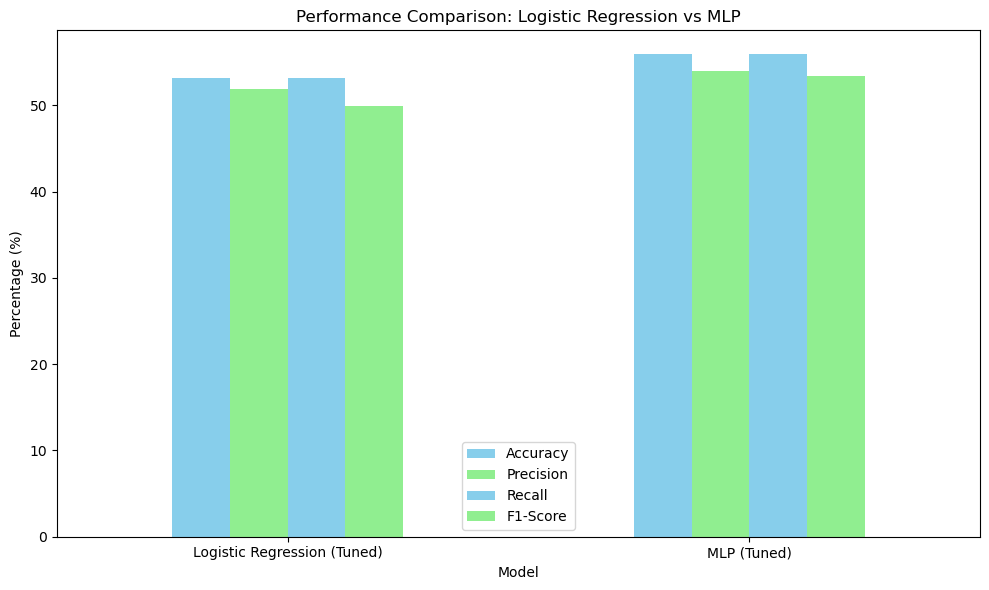

In [388]:
comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Performance Comparison: Logistic Regression vs MLP')
plt.xlabel('Model')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
